In [1]:
import ROOT as r
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/09


In [2]:
def get_bias(proc, val=1):
    
    df = pd.DataFrame()
    
#    fname = 'bias{}'.format(mu)+proc+'.root'
#    fname = 'bias{}'.format(val)+proc+'.root'
    fname = 'higgsCombine{}'.format(proc)+'_Bias{}_merged.root'.format(val)
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    
    val_Sig = val
        
    print(val_Sig)
    
    vals_Sig = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        
        mu = rtree.trackedParam_r
        errmu = rtree.trackedError_r
               
        #print(i, mu, errmu)
        if errmu !=0 and abs((mu-val)/errmu)<6:
            vals_Sig.append((mu-val)/errmu)
            
    df['r'] = vals_Sig
            
    return df

In [3]:
def draw_bias(proc, mu):

    df = get_bias(proc, mu)
    
    minval = -5
    maxval = 5
    x = np.linspace(minval,maxval, 200)
    bins = np.linspace(minval,maxval, 50)
#    fig, ax = plt.subplots(1,2,figsize=(12,4))
    fig, ax = plt.subplots()
    

    val = mu

    # Sig
    goftoys = df['r'].values
    goftoys = np.clip(goftoys,minval,maxval)
        
    c, d = norm.fit(goftoys) 
#    fi2 = ax[1].plot(
    fi2 = ax.plot(
        x,
        norm(c,d).pdf(x) * len(goftoys) * (bins[1] - bins[0]),
        'k-',
        lw=2,
        color='blue', ls='--',
        label=r'$\bar{x}=$' + '{:.3f}\n'.format(c) + r'$\sigma_x=$' + '{:.3f}'.format(d),
    )
#    hi2 = ax[1].hist(goftoys,
    hi2 = ax.hist(goftoys,
            histtype='step',
            bins=bins,
            lw=2,
            #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
            label='Toys\nN = {}'.format(len(goftoys)),
            color='black')

#    ax[1].axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
#    ax[1].axvline(c, ls='--', color='blue', alpha=1)
    ax.axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
    ax.axvline(c, ls='--', color='blue', alpha=1)

#    l2 = ax[1].legend(title=r'$\mu=${}'.format(val), loc=0)
    l2 = ax.legend(title=r'$\mu=${}'.format(val), loc=0)
#    for t in l1.texts: t.set_multialignment('center');
#    ax[1].set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
#    ax[1].set_ylabel("Pseudoexperiments", ha='right', y=1)
    ax.set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
    ax.set_ylabel("Pseudoexperiments", ha='right', y=1)    
    plt.show()

#    fig.savefig('plots/single_bias_{}_{}.pdf'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')
    fig.savefig('plots/single_bias_{}_{}.png'.format(mu, proc), transparent=True, dpi=300, bbox_inches='tight')

0


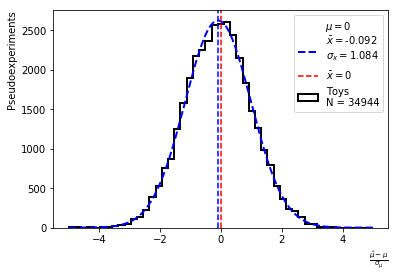

1


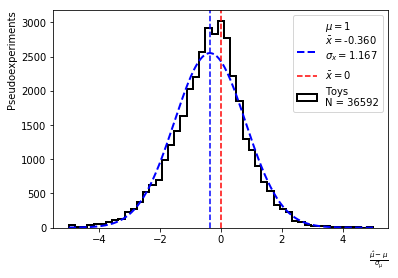

2


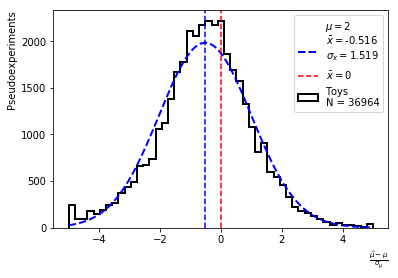

3


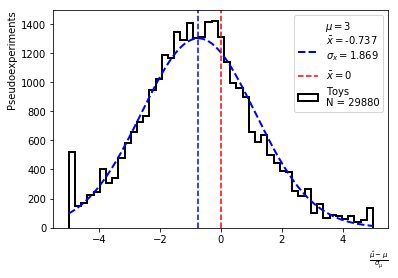

4


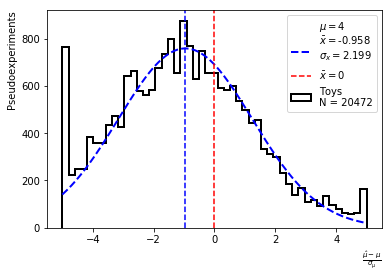

5


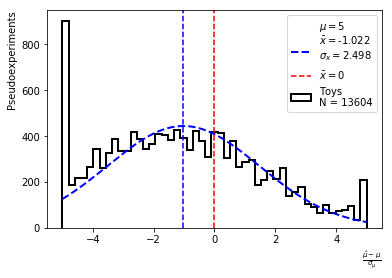

6


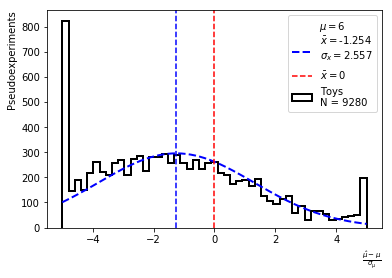

7


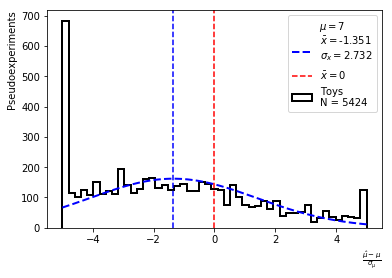

8


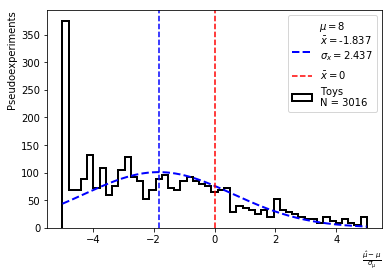

9


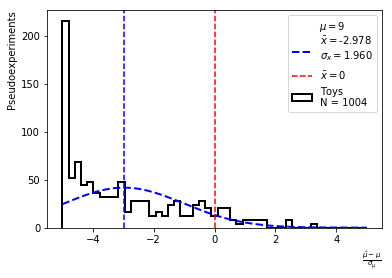

10


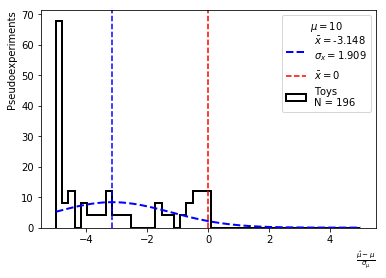

In [4]:
proc = "Sig25"
for mu in range(0,11):
    draw_bias(proc,mu)